# RakamTanima CNN

---


### Kurulum ve Kontroller

In [20]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5815433482785106706
 xla_global_id: -1]

### Uygulama Başlangıç

In [48]:
from __future__ import print_function
import keras
import tensorflow
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Veriden örnekleri görselleştirme

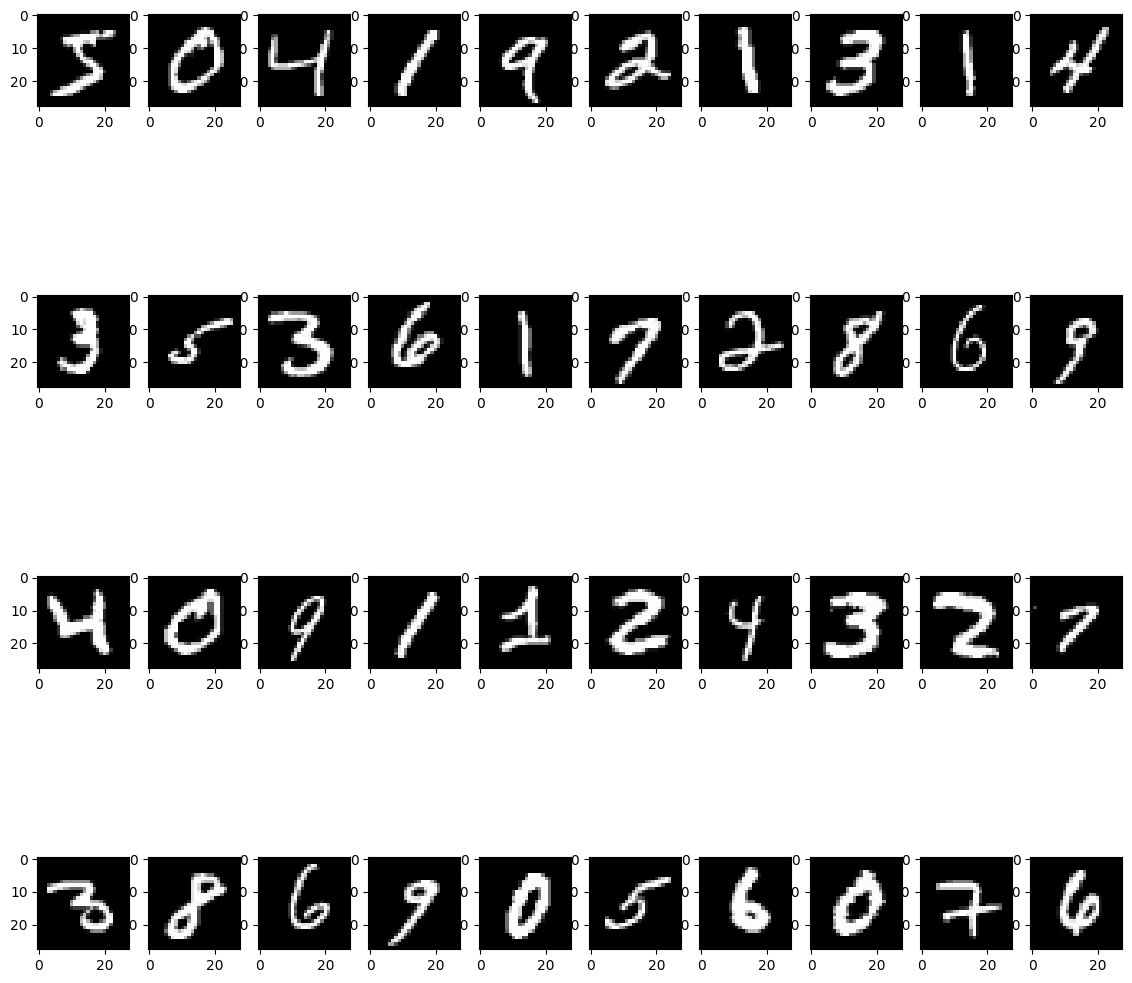

In [23]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [24]:
batch_size = 128 
num_classes = 10 
epochs = 12 # 12 epoch önerilir

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [25]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

## MODEL OLUŞTURMA

In [26]:
model = Sequential() 

**Katmanların oluşturulması**

In [27]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

Modell Görselleştirme


In [28]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = tensorflow.keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

### Eğitim İşlemleri

In [30]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.1237 - loss: 36.0730 - val_accuracy: 0.4679 - val_loss: 3.8184
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.2372 - loss: 14.5683 - val_accuracy: 0.6104 - val_loss: 1.8411
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.3169 - loss: 7.5857 - val_accuracy: 0.6214 - val_loss: 1.2776
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.3499 - loss: 4.3917 - val_accuracy: 0.5570 - val_loss: 1.3548
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.3422 - loss: 3.0619 - val_accuracy: 0.4905 - val_loss: 1.5326
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.3411 - loss: 2.4452 - val_accuracy: 0.4802 - val_loss: 1.6155
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.3509 - loss: 2.1926 - val_accuracy: 0.4872 - val_loss: 1.6230
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.3584 - loss: 2.0541 

In [31]:
model.save('mnist_model.h5')

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


Test Loss: 1.3158551454544067
Test Accuracy: 0.6668000221252441


**Rastgele değer için test işlemi**

In [33]:
model_test = model.save('save_models/mnist_model.h5')

In [34]:
test_image = x_test[32]
y_test[32]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

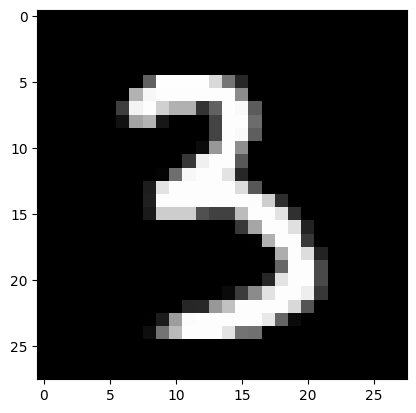

In [35]:
plt.imshow(test_image.reshape(28,28), cmap='gray', vmin=2, vmax=255)

In [51]:
testData = x_test[128].reshape(1,28,28,1)
pre = model.predict(testData, batch_size=1)

preds = np.argmax(pre, axis=1)
prob = pre
print(preds, prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[8] [[0.09981383 0.09953615 0.09997376 0.10004307 0.1002237  0.10007339
  0.099894   0.0999907  0.10027236 0.10017905]]
